[-3.51853055 -2.52025021]


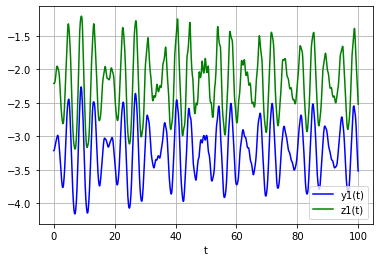

583 ms ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [118]:
from scipy.integrate import odeint
import numpy as np
from numpy import sin, cos, sqrt
import matplotlib.pyplot as plt

_f=6250
_K=10000
def Model1(y, t, omega=1.4005, K=_K, rho=1025, g=9.8, mf=4866, mb=2433, ma=1335.535, k=80000, l=0.5, ht=0.8,hc=3, f=_f, lamda=151.4388,r=1):
    y1, y2, z1, z2 = y

    dy1 = y2
    dz1 = z2
    
    Ff=0
    if np.abs(y1)<=ht:
        Ff=-1/3*rho*g*np.pi*r*r*y1
    elif ht+hc>=np.abs(y1)>ht:
        Ff=rho*g*((np.pi*(r*r)*ht)/3-np.pi*r*r*(y1+ht))
    elif np.abs(y1)>=ht+hc:
        Ff=rho*g*(1/3*np.pi*r*r*ht+np.pi*r*r*hc)   
    
    K=-np.sign(z2-y2)*K*sqrt(np.abs(z2-y2))
    
    dy2 = (f*cos(omega*t)-(mf+ma)*g+k*(z1-y1-ht-l)+K*(z2-y2)-lamda*y2+Ff)/(ma+mf)
    # dy2=(f*cos(omega*t)-(mf+ma)*g+k*(z1-y1-ht-l))/(ma+mf)

    dz2 = (-mb*g-k*(z1-y1-ht-l)-K*(z2-y2))/mb
    # dz2=(-mb*g-k*(z1-y1-ht-l))/mb

    return [dy1, dy2, dz1, dz2]

y0 = [-3.214, 0, -2.21, 0]
t = np.linspace(0, 100, 1000)
sol1 = odeint(Model1, y0, t)
# sol1 = np.log(sol1)

plt.plot(t, sol1[:, 0], 'b', label='y1(t)')
plt.plot(t, sol1[:, 2], 'g', label='z1(t)')
print(sol1[-1,[0,2]])
# plt.plot(t, sol1[:, 1], 'b', label='y2(t)')
# plt.plot(t, sol1[:, 3], 'g', label='z2(t)')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

plt.show()

# k*(-ht-l)+Ff
%timeit odeint(Model1, y0, t)


方程组的每一条形如

$\frac{dy_i}{dt}=f_i(y_1,y_2,\dots,y_n)$

可以用中间变量方便书写，也可以用奇怪的分段函数，即可以用 if

比如以下之类的

$$
p=f(y_1,y_2)\\
\frac{dy_i}{dt}=p^2\\
\ \\
\frac{dy_i}{dt}=|p|
$$

简单说就是最后的式子左边只能是一阶微分，不能是 cos(dy/dt)，也不能是 dy1-dy2 之类的。右边随便搞

另外 $y_1,y_2,...y_n$ 需要给出初值